## Metrics Plot
### seaborn.heatmap¶
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

Parameters
datarectangular dataset
2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

vmin, vmaxfloats, optional
Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

cmapmatplotlib colormap name or object, or list of colors, optional
The mapping from data values to color space. If not provided, the default will depend on whether center is set.

centerfloat, optional
The value at which to center the colormap when plotting divergant data. Using this parameter will change the default cmap if none is specified.

robustbool, optional
If True and vmin or vmax are absent, the colormap range is computed with robust quantiles instead of the extreme values.

annotbool or rectangular dataset, optional
If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

fmtstring, optional
String formatting code to use when adding annotations.

annot_kwsdict of key, value mappings, optional
Keyword arguments for ax.text when annot is True.

linewidthsfloat, optional
Width of the lines that will divide each cell.

linecolorcolor, optional
Color of the lines that will divide each cell.

cbarboolean, optional
Whether to draw a colorbar.

cbar_kwsdict of key, value mappings, optional
Keyword arguments for fig.colorbar.

cbar_axmatplotlib Axes, optional
Axes in which to draw the colorbar, otherwise take space from the main Axes.

squareboolean, optional
If True, set the Axes aspect to “equal” so each cell will be square-shaped.

xticklabels, yticklabels“auto”, bool, list-like, or int, optional
If True, plot the column names of the dataframe. If False, don’t plot the column names. If list-like, plot these alternate labels as the xticklabels. If an integer, use the column names but plot only every n label. If “auto”, try to densely plot non-overlapping labels.

maskboolean array or DataFrame, optional
If passed, data will not be shown in cells where mask is True. Cells with missing values are automatically masked.

axmatplotlib Axes, optional
Axes in which to draw the plot, otherwise use the currently-active Axes.

kwargsother keyword arguments
All other keyword arguments are passed to matplotlib.axes.Axes.pcolormesh().

Returns
axmatplotlib Axes
Axes object with the heatmap.

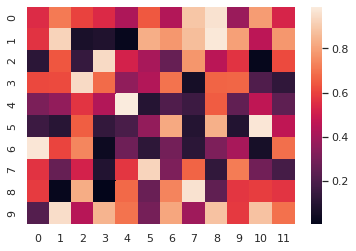

In [11]:
# Examples
# Plot a heatmap for a numpy array:
import numpy as np; np.random.seed(0)
import seaborn as sns;
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data)

Change the limits of the colormap:

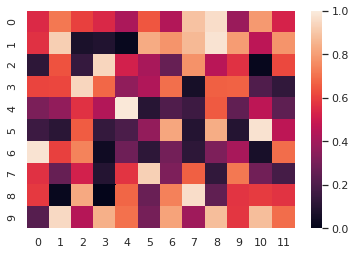

In [12]:
sns.heatmap(uniform_data, vmin=0, vmax=1)

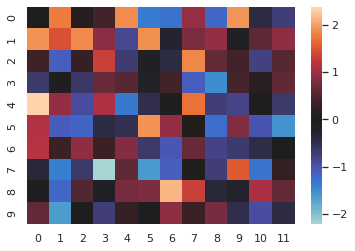

In [13]:
# Plot a heatmap for data centered on 0 with a diverging colormap:

normal_data = np.random.randn(10, 12)
sns.heatmap(normal_data, center=0)

In [14]:
# Plot a dataframe with meaningful row and column labels:

flights1 = sns.load_dataset("flights")
flights = flights1.pivot("month", "year", "passengers")

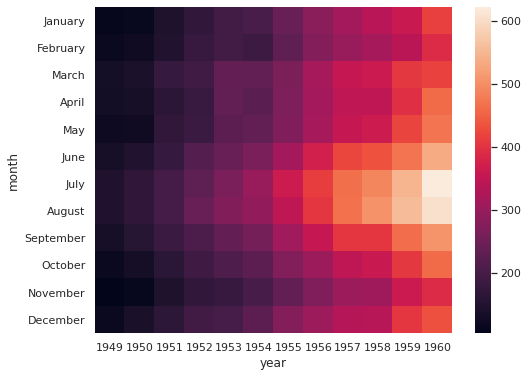

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(flights)

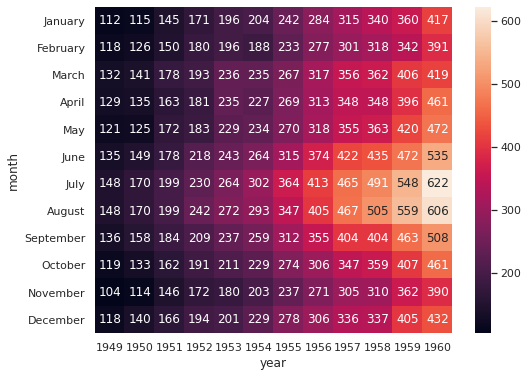

In [26]:
# Annotate each cell with the numeric value using integer formatting:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(flights, annot=True, fmt="d")

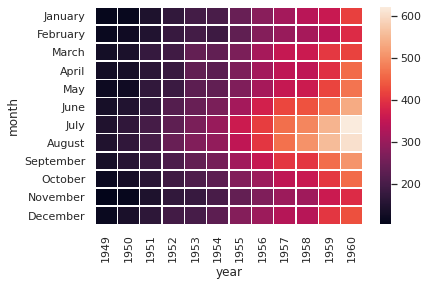

In [24]:
#Add lines between each cell:

ax = sns.heatmap(flights, linewidths=.5)

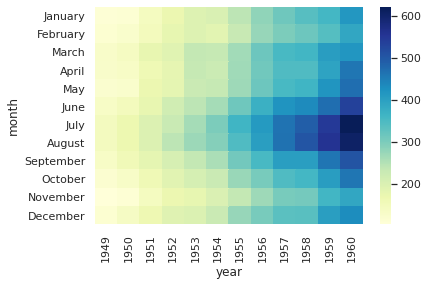

In [27]:
# Use a different colormap:

ax = sns.heatmap(flights, cmap="YlGnBu")

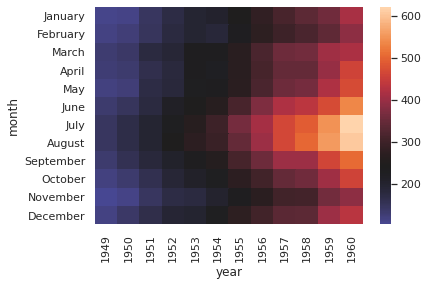

In [28]:
# Center the colormap at a specific value:

ax = sns.heatmap(flights, center=flights.loc["January", 1955])

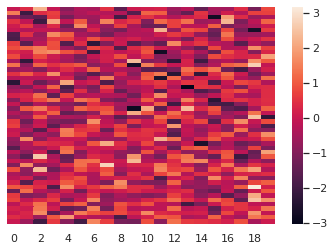

In [29]:
# Plot every other column label and don’t plot row labels:

data = np.random.randn(50, 20)
ax = sns.heatmap(data, xticklabels=2, yticklabels=False)

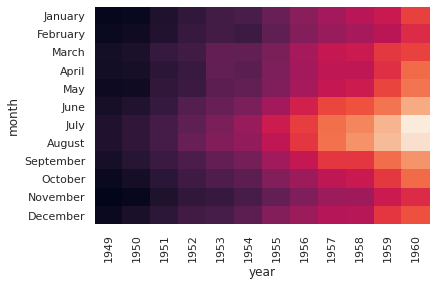

In [30]:
# Don’t draw a colorbar:

ax = sns.heatmap(flights, cbar=False)

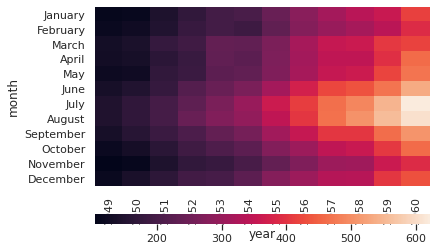

In [31]:
# Use different axes for the colorbar:

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

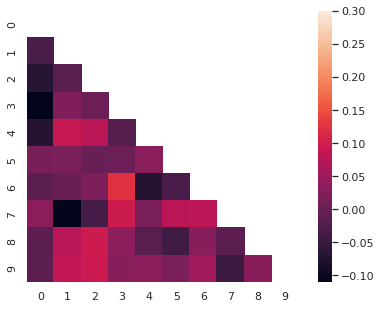

In [32]:
#Use a mask to plot only part of a matrix

corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)